In [2]:
import numpy as np

Найти значение параметра $w$ минимизируеюшего зависимость
$$ y = w*x$$
Где $y$ и $x$ - константы

Алгоритм:
1. выписываем функцию ошибки: $Loss = (y - w*x)^2$
2. находим градиент функции $Loss$:  $ \nabla_w Loss = -2(y-w*x)x$
3. задаем начальное значение параметра $w$
4. в цикле обновляем градиент $ w = w - \eta\nabla_w Loss$

Градиентный спуск numpy

In [7]:
y = 1
x = 3
w = np.array(1) # начальное значение параметра w
loss = (y - w*x)**2 # функция ошибки
grad_w = lambda w: -2*(y - w*x)*x

eps = 10**-6
i=0
while True & i<1000:
    i += 1
    w1 = w - 0.1*grad_w(w)
    if np.abs(w1-w)<eps:
        print('Количество итераций =',i)
        break
    w = w1
    if i%5 == 0:
        print(w)

0.11487999999999993
0.4049161216000001
0.30987708527411195
0.3410194766973789
0.3308147378758028
0.33415862669285695
0.33306290120528476
0.3334219485330524
0.3333042959046895
0.33334284831795136
0.3333302154631737
0.33333435499702724
Количество итераций = 64


In [6]:
# loss
print((y - w*x)**2)

2.462625387195531e-12


Градиентный спуск torch

In [3]:
import torch

In [4]:
y = 2
x = 1
w = torch.tensor(0.1, requires_grad=True) # здесь если задать целое число, при расчете градиента torch выдаст ошибку

При использовании torch задача упрощается тем, что фреймворк посчитает градиент. Для нашего игрушечного примера не совсем очевидно преимущество, но для обучения нейросетей это подход, как увидим в будущем, будет очень удобным 

In [5]:

x = 1
y = 2

w = torch.tensor(0.1,requires_grad=True)

for i in range(30):
  loss = (y - x*w)**2
  loss.backward()
  with torch.no_grad():
    w -= 0.1*w.grad
    print(w,w.grad)
  w.grad.zero_()

tensor(0.4800, requires_grad=True) tensor(-3.8000)
tensor(0.7840, requires_grad=True) tensor(-3.0400)
tensor(1.0272, requires_grad=True) tensor(-2.4320)
tensor(1.2218, requires_grad=True) tensor(-1.9456)
tensor(1.3774, requires_grad=True) tensor(-1.5565)
tensor(1.5019, requires_grad=True) tensor(-1.2452)
tensor(1.6015, requires_grad=True) tensor(-0.9961)
tensor(1.6812, requires_grad=True) tensor(-0.7969)
tensor(1.7450, requires_grad=True) tensor(-0.6375)
tensor(1.7960, requires_grad=True) tensor(-0.5100)
tensor(1.8368, requires_grad=True) tensor(-0.4080)
tensor(1.8694, requires_grad=True) tensor(-0.3264)
tensor(1.8955, requires_grad=True) tensor(-0.2611)
tensor(1.9164, requires_grad=True) tensor(-0.2089)
tensor(1.9331, requires_grad=True) tensor(-0.1671)
tensor(1.9465, requires_grad=True) tensor(-0.1337)
tensor(1.9572, requires_grad=True) tensor(-0.1070)
tensor(1.9658, requires_grad=True) tensor(-0.0856)
tensor(1.9726, requires_grad=True) tensor(-0.0685)
tensor(1.9781, requires_grad=Tr

### Задача 1
Найти решение нелинейного уравнения
$$ sin(x) + e^x - 1 = 0 $$

In [12]:
target = 0
x = torch.tensor(1.,requires_grad=True) # начальная точка 

In [13]:
y = torch.sin(x) + torch.exp(x) - 1
target = 0
loss = (y - target)**2
loss

tensor(6.5523, grad_fn=<PowBackward0>)

In [14]:
for i in range(100):
  y = torch.sin(x) + torch.exp(x) - 1
  loss = (y - target)**2
  loss.backward()
  with torch.no_grad():
    x -= 1*x.grad
    if i%10 == 0:
        print(x,x.grad)
  x.grad.zero_()

tensor(-15.6823, requires_grad=True) tensor(16.6823)
tensor(-17.4783, requires_grad=True) tensor(-0.0090)
tensor(-17.4264, requires_grad=True) tensor(-0.0034)
tensor(-17.4015, requires_grad=True) tensor(-0.0019)
tensor(-17.3862, requires_grad=True) tensor(-0.0013)
tensor(-17.3755, requires_grad=True) tensor(-0.0009)
tensor(-17.3674, requires_grad=True) tensor(-0.0007)
tensor(-17.3611, requires_grad=True) tensor(-0.0006)
tensor(-17.3560, requires_grad=True) tensor(-0.0005)
tensor(-17.3518, requires_grad=True) tensor(-0.0004)


In [16]:
print(torch.sin(x) + torch.exp(x) - 1)

tensor(-0.0024, grad_fn=<SubBackward0>)


### Задача 2
Найти коэффициенты $a$ и $b$ линейной регрессии
$$ y = ax + b$$

In [37]:
x = torch.arange(0,1,0.1)
target = 2*x + 1 + torch.randn(x.shape)/3

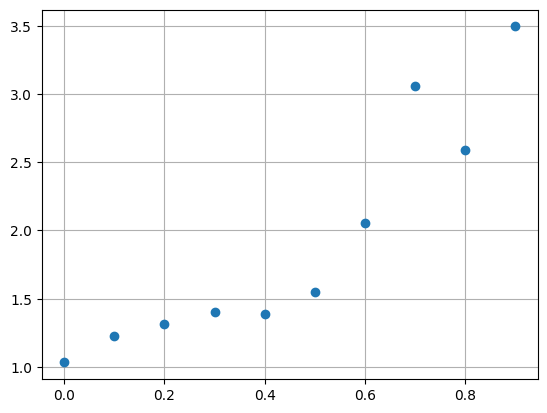

In [38]:
import matplotlib.pyplot as plt
plt.plot(x,target,'o')
plt.grid(True)

Задаем коэффициенты линейной регрессии. Необходимо указать, что эти коэффициенты обучаемы (т.е. добавить опцию requires_grad=True)

In [39]:
a = torch.tensor(1.,requires_grad=True)
b = torch.tensor(0.,requires_grad=True)

In [28]:
loss = torch.sum((a*x + b - target)**2)
loss

tensor(21.4126, grad_fn=<SumBackward0>)

In [42]:
for i in range(200):
  y = a*x + b
  loss = torch.sum((y - target)**2)
  loss.backward()
  with torch.no_grad():
    a -= 0.01*a.grad
    b -= 0.01*b.grad
    if i%20 == 0:
        print(loss.detach())
  a.grad.zero_()
  b.grad.zero_()

tensor(1.1414)
tensor(1.1190)
tensor(1.1060)
tensor(1.0985)
tensor(1.0941)
tensor(1.0916)
tensor(1.0901)
tensor(1.0893)
tensor(1.0888)
tensor(1.0885)


In [43]:
a,b

(tensor(2.5642, requires_grad=True), tensor(0.7579, requires_grad=True))

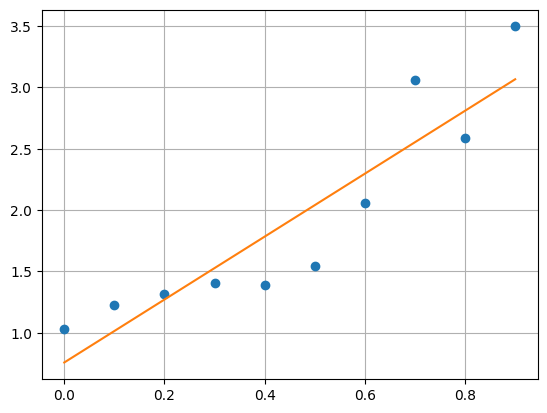

In [44]:
Y = y.detach()
plt.plot(x,target,'o')
plt.plot(x,Y)
plt.grid(True)